# Introduction to TensorFlow

In [1]:
from IPython.display import Image

## Installing TensorFlow

In [2]:
import tensorflow as tf

# Create TensorFlow object called tensor
hello_constant = tf.constant('Hello World!')

with tf.Session() as sess:
    # Run the tf.constant operation in the session
    output = sess.run(hello_constant)
    print(output)

b'Hello World!'


## Input

In [3]:
# Solution is available in the other "solution.py" tab
import tensorflow as tf


def run():
    output = None
    x = tf.placeholder(tf.int32)

    with tf.Session() as sess:
        # TODO: Feed the x tensor 123
        output = sess.run(x, feed_dict={x: 123})

    return output


## Math

In [4]:
# Solution is available in the other "solution.py" tab
import tensorflow as tf

# TODO: Convert the following to TensorFlow:
x = 10
y = 2
z = x/y - 1

# also tf.add, tf.subtract can be used

x = tf.constant(x)
y = tf.constant(y)
z = tf.constant(z)
# TODO: Print z from a session
with tf.Session() as sess:
    output = sess.run(z)
    print(output)

4.0


## Linear Function

In [5]:
Image(url='https://d17h27t6h515a5.cloudfront.net/topher/2016/November/5839dd1c_wx-1/wx-1.jpg')

In [6]:
Image(url='https://d17h27t6h515a5.cloudfront.net/topher/2016/December/586443ae_wx-b/wx-b.jpg')

In [7]:
Image(url='https://d17h27t6h515a5.cloudfront.net/topher/2016/November/5834fd95_codecogseqn-13/codecogseqn-13.gif')

In [58]:
w = [[-0.5, 0.2, 0.1], [0.7, -0.8, 0.2]]
w1 = [[-0.5, 0.7], [0.2, -0.8], [0.1, 0.2]]
x = [0.2, 0.5, 0.6]
x1 = [[0.2, 0.5, 0.6]]
b = [0.1, 0.2]

In [59]:
import numpy as np

print("w: ", w)
print("x: ", x)
print(np.dot(w, x))

print ("  ")

print("x1: ", x1)
print("w1: ", w1)
print(np.dot(x1, w1))

print("+bias", np.dot(w, x))

w:  [[-0.5, 0.2, 0.1], [0.7, -0.8, 0.2]]
x:  [0.2, 0.5, 0.6]
[ 0.06 -0.14]
  
x1:  [[0.2, 0.5, 0.6]]
w1:  [[-0.5, 0.7], [0.2, -0.8], [0.1, 0.2]]
[[ 0.06 -0.14]]
+bias [ 0.06 -0.14]


In [64]:
# Solution is available in the other "quiz_solution.py" tab
import tensorflow as tf

def get_weights(n_features, n_labels):
    """
    Return TensorFlow weights
    :param n_features: Number of features
    :param n_labels: Number of labels
    :return: TensorFlow weights
    """
    # TODO: Return weights
    return tf.Variable(tf.truncated_normal((n_features, n_labels)))


def get_biases(n_labels):
    """
    Return TensorFlow bias
    :param n_labels: Number of labels
    :return: TensorFlow bias
    """
    # TODO: Return biases
    return tf.Variable(tf.zeros(n_labels))


def linear(input, w, b):
    """
    Return linear function in TensorFlow
    :param input: TensorFlow input
    :param w: TensorFlow weights
    :param b: TensorFlow biases
    :return: TensorFlow linear function
    """
    # TODO: Linear Function (xW + b)
    return tf.add(tf.matmul(input, w), b)

In [70]:
# Solution is available in the other "sandbox_solution.py" tab
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
#from quiz import get_weights, get_biases, linear


def mnist_features_labels(n_labels):
    """
    Gets the first <n> labels from the MNIST dataset
    :param n_labels: Number of labels to use
    :return: Tuple of feature list and label list
    """
    mnist_features = []
    mnist_labels = []

    mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

    # In order to make quizzes run faster, we're only looking at 10000 images
    for mnist_feature, mnist_label in zip(*mnist.train.next_batch(10000)):

        # Add features and labels if it's for the first <n>th labels
        if mnist_label[:n_labels].any():
            mnist_features.append(mnist_feature)
            mnist_labels.append(mnist_label[:n_labels])

    return mnist_features, mnist_labels


# Number of features (28*28 image is 784 features)
n_features = 784
# Number of labels
n_labels = 3

# Features and Labels
features = tf.placeholder(tf.float32)
labels = tf.placeholder(tf.float32)

# Weights and Biases
w = get_weights(n_features, n_labels)
b = get_biases(n_labels)

# Linear Function xW + b
logits = linear(features, w, b)

# Training data
train_features, train_labels = mnist_features_labels(n_labels)

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    
    # Softmax
    prediction = tf.nn.softmax(logits)

    # Cross entropy
    # This quantifies how far off the predictions were.
    # You'll learn more about this in future lessons.
    cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)

    # Training loss
    # You'll learn more about this in future lessons.
    loss = tf.reduce_mean(cross_entropy)

    # Rate at which the weights are changed
    # You'll learn more about this in future lessons.
    learning_rate = 0.08

    # Gradient Descent
    # This is the method used to train the model
    # You'll learn more about this in future lessons.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    # Run optimizer and get loss
    _, l = session.run(
        [optimizer, loss],
        feed_dict={features: train_features, labels: train_labels})

# Print loss
print('Loss: {}'.format(l))


PermissionDeniedError: /datasets

# Softmax

In [66]:
# Solution is available in the other "solution.py" tab
import numpy as np


def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    # TODO: Compute and return softmax(x)
    return np.exp(x) / np.sum(np.exp(x), axis=0)

logits = [3.0, 1.0, 0.2]
print(softmax(logits))

[ 0.8360188   0.11314284  0.05083836]


In [67]:
# Solution is available in the other "solution.py" tab
import tensorflow as tf


def run():
    output = None
    logit_data = [2.0, 1.0, 0.1]
    logits = tf.placeholder(tf.float32)
    
    # TODO: Calculate the softmax of the logits
    softmax = tf.nn.softmax(logits)
    
    with tf.Session() as sess:
        # TODO: Feed in the logit data
        output = sess.run(softmax, feed_dict={logits: logit_data})

    return output

## Cross-Entropy

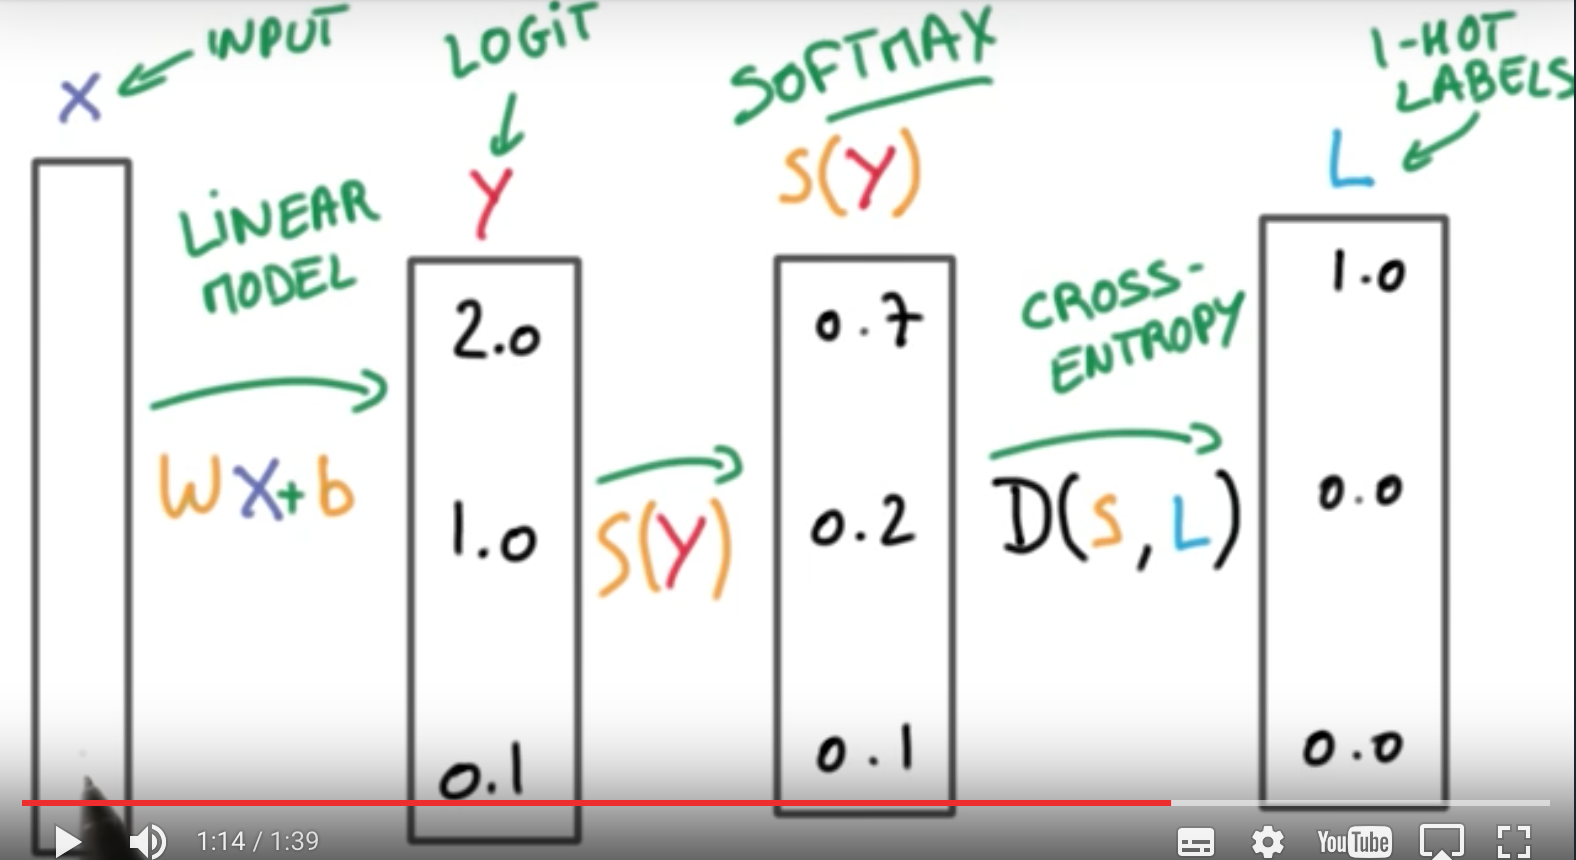

In [69]:
Image(filename='cross_entropy.png')

In [68]:
Image(url='https://d17h27t6h515a5.cloudfront.net/topher/2017/February/589b18f5_cross-entropy-diagram/cross-entropy-diagram.png')

In [71]:
# Solution is available in the other "solution.py" tab
import tensorflow as tf

softmax_data = [0.7, 0.2, 0.1]
one_hot_data = [1.0, 0.0, 0.0]

softmax = tf.placeholder(tf.float32)
one_hot = tf.placeholder(tf.float32)
cross_entropy = -tf.reduce_sum(tf.multiply(one_hot, tf.log(softmax)))

# TODO: Print cross entropy from session
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    print(session.run(cross_entropy, feed_dict={softmax: softmax_data, one_hot: one_hot_data}))


0.356675


## Stochastic Gradient Descent

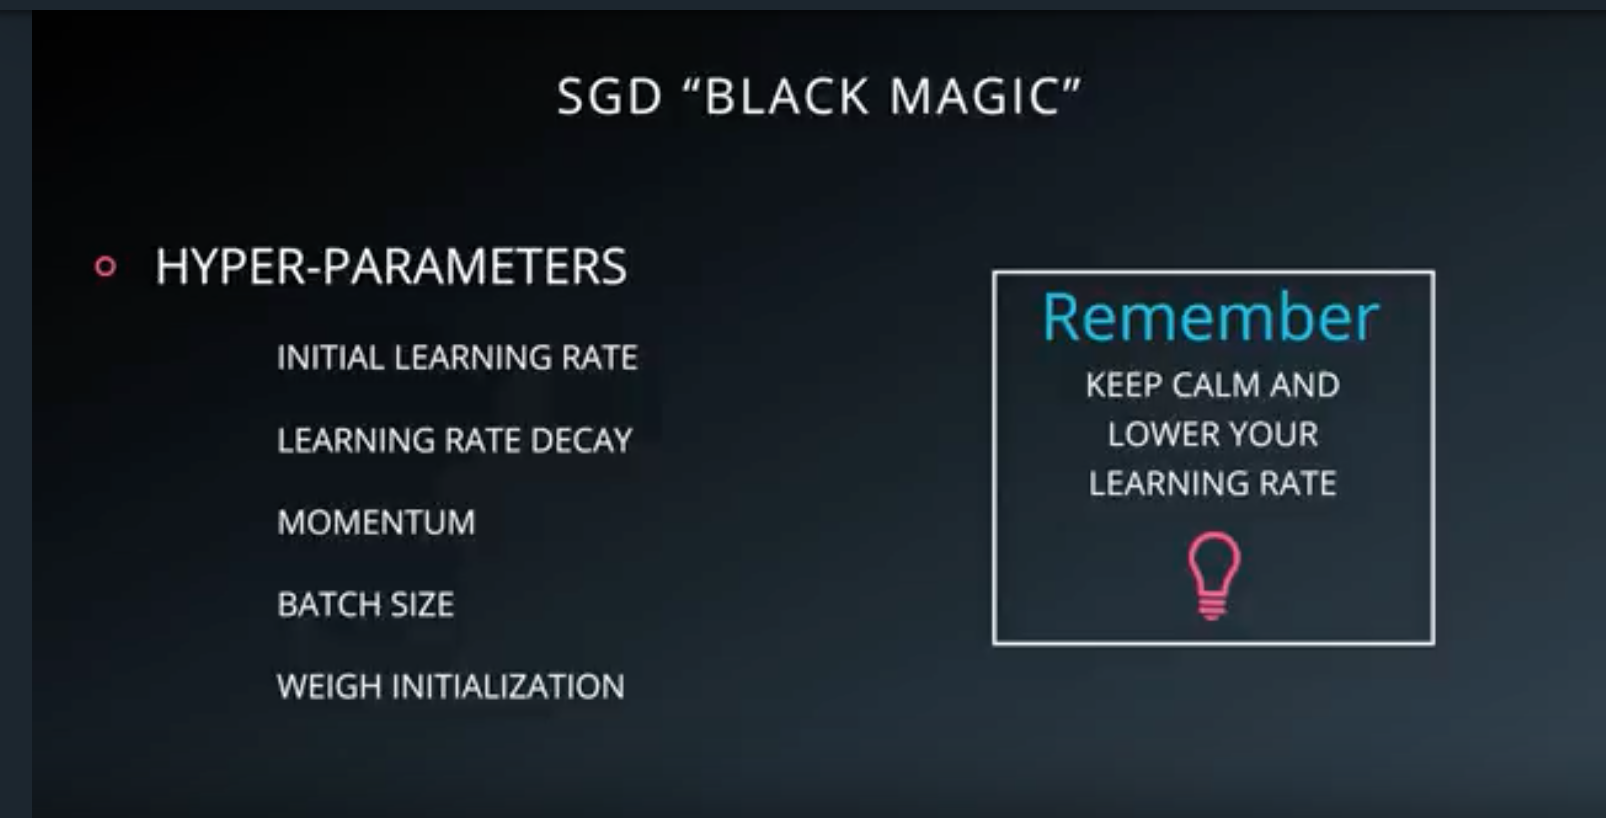

In [72]:
Image(filename='sgd.png')

also use **ADAGRAD**

## Mini-batching

In [73]:
import math
def batches(batch_size, features, labels):
    """
    Create batches of features and labels
    :param batch_size: The batch size
    :param features: List of features
    :param labels: List of labels
    :return: Batches of (Features, Labels)
    """
    assert len(features) == len(labels)
    outout_batches = []
    
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
        
    return outout_batches


In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
#from helper import batches

learning_rate = 0.001
n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

# Import MNIST data
mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

# The features are already scaled and the data is shuffled
train_features = mnist.train.images
test_features = mnist.test.images

train_labels = mnist.train.labels.astype(np.float32)
test_labels = mnist.test.labels.astype(np.float32)

# Features and Labels
features = tf.placeholder(tf.float32, [None, n_input])
labels = tf.placeholder(tf.float32, [None, n_classes])

# Weights & bias
weights = tf.Variable(tf.random_normal([n_input, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

# Logits - xW + b
logits = tf.add(tf.matmul(features, weights), bias)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Calculate accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


# TODO: Set batch size
batch_size = 128
assert batch_size is not None, 'You must set the batch size'

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    # TODO: Train optimizer on all batches
    # for batch_features, batch_labels in ______
    for batch_features, batch_labels in batches(batch_size, train_features, train_labels):
        sess.run(optimizer, feed_dict={features: batch_features, labels: batch_labels})

    # Calculate accuracy for test dataset
    test_accuracy = sess.run(
        accuracy,
        feed_dict={features: test_features, labels: test_labels})

print('Test Accuracy: {}'.format(test_accuracy))
